# Predicting the Power Output of Wind Turbines

## PSTAT 231 Final Project

### Benjamin Drabeck
### March 2024

In [30]:
from IPython.display import HTML, display

def toggle_code_button():
    display(HTML('''
        <script>
            document.addEventListener('DOMContentLoaded', function() {
                document.querySelectorAll('.jp-CodeCell').forEach(function(cell) {
                    // Create the button
                    var button = document.createElement('button');
                    button.innerText = 'Show code';
                    button.style.margin = '5px';

                    // Initially hide the code
                    var input_area = cell.querySelector('.jp-InputArea');
                    input_area.style.display = 'none';

                    // Toggle visibility on button click
                    button.onclick = function(){
                        if (input_area.style.display === 'none') {
                            input_area.style.display = 'block';
                            button.innerText = 'Hide code';
                        } else {
                            input_area.style.display = 'none';
                            button.innerText = 'Show code';
                        }
                    };

                    // Prepend button to the code cell
                    cell.prepend(button);
                });
            });
        </script>
    '''))

toggle_code_button()


# Introduction

This project will explore and achieve the goal of developing a model that will predict wind turbine power output based on various weather conditions. Wind turbines are devices that convert the wind's kinetic energy into electrical power, serving as a cornerstone for renewable energy solutions. A typical modern wind turbine can produce enough electricity to power around 1,500 average homes annually. This capability makes wind turbines a vital component of the global strategy to reduce carbon emissions and combat climate change by providing a clean, sustainable energy source. By forecasting power output under varying weather conditions, companies can make more informed choices regarding turbine placement, maintenance scheduling, and grid management.


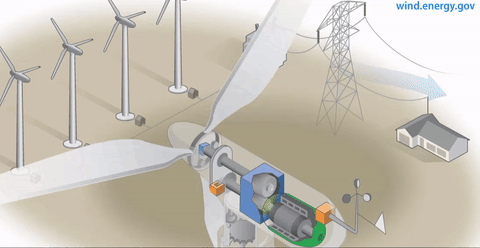

In [195]:
import base64
from IPython.display import HTML

with open("giphy.gif", "rb") as image_file:
    encoded_string = base64.b64encode(image_file.read()).decode()
html_str = f'<img src="data:image/gif;base64,{encoded_string}" alt="Embedded GIF" />'
HTML(html_str)


# Why is this important?

Optimizing wind turbine locations is essential for enhancing their efficiency and power output, crucial in the fight against climate change. Strategic placement maximizes renewable energy generation, reduces reliance on fossil fuels, and lowers wind energy costs, making it more competitive. Additionally, it minimizes environmental impact, supporting sustainability and energy security efforts. Efficiently harnessing wind power through optimized locations is key to a sustainable energy future.


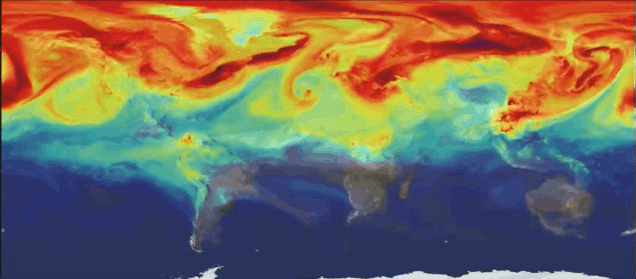

In [198]:
import base64
from IPython.display import HTML

with open("climate_change_map.gif", "rb") as image_file:
    encoded_string = base64.b64encode(image_file.read()).decode()
html_str2 = f'<img src="data:image/gif;base64,{encoded_string}" alt="Embedded GIF" />'
HTML(html_str2)

# Loading Data, Libraries, & Exploratory Data Analysis

This dataset is a unique compilation of field-based meteorological observations and wind power generation data found on [Kaggle.](https://www.kaggle.com/datasets/mubashirrahim/wind-power-generation-data-forecasting) The dataset represents a detailed hourly record, starting on January 2, 2017, at four different wind turbine locations at different heights. Unfortunately, the owner of the dataset cannot disclose the precise locations of the turbines due to privacy and security reasons.

In [43]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
#Location 1
df1 = pd.read_csv('Location1.csv')
#Location 2
df2 = pd.read_csv('Location2.csv')
#Location 3
df3 = pd.read_csv('Location3.csv')
#Location 4
df4 = pd.read_csv('Location4.csv')
df1.head()
df1.shape
df1.describe()

temperature_2m  relativehumidity_2m   dewpoint_2m  windspeed_10m  \
count    43800.000000         43800.000000  43800.000000   43800.000000   
mean        47.862911            72.288744     38.569308       3.591147   
std         19.453691            16.852287     18.772110       1.649318   
min        -14.400000            18.000000    -17.100000       0.000000   
25%         32.100000            60.000000     24.300000       2.410000   
50%         47.300000            74.000000     38.100000       3.300000   
75%         64.500000            86.000000     54.700000       4.590000   
max         94.100000           100.000000     76.300000      13.450000   

       windspeed_100m  winddirection_10m  winddirection_100m  windgusts_10m  \
count    43800.000000       43800.000000        43800.000000   43800.000000   
mean         6.284431         203.637329          203.343676       7.771795   
std          2.685216          96.371262           97.959852       3.569147   
min          0.100000           1.000000            0.000000       0.500000   
25%          4.380000         132.000000          130.000000       5.000000   
50%          6.080000         225.000000          226.000000       7.200000   
75%          7.990000         277.000000          278.000000      10.000000   
max         20.650000         360.000000          360.000000      29.200000   

              Power  
count  43800.000000  
mean       0.405385  
std        0.288322  
min        0.000000  
25%        0.148900  
50%        0.347650  
75%        0.659600  
max        0.991300

Power output is our response that we will be trying to predict, ranging from 0-1. Location 1's average power output is 0.405385, with its highest efficiency at 0.9913. The columns with 2 m, 10m, or 100m indicate the height in meters at which the data was collected. For example, the windspeed at 100 meters is typically higher than the windspeed at 10 meters. This is due to the higher elevation having less dense air and being less vulnerable to the effects of the terrain and solar heating of the Earth's surface.

In [5]:
df1

Time  temperature_2m  relativehumidity_2m  dewpoint_2m  \
0      2017-01-02 00:00:00            28.5                   85         24.5   
1      2017-01-02 01:00:00            28.4                   86         24.7   
2      2017-01-02 02:00:00            26.8                   91         24.5   
3      2017-01-02 03:00:00            27.4                   88         24.3   
4      2017-01-02 04:00:00            27.3                   88         24.1   
...                    ...             ...                  ...          ...   
43795  2021-12-31 19:00:00            34.1                   94         32.5   
43796  2021-12-31 20:00:00            34.8                   94         33.4   
43797  2021-12-31 21:00:00            34.1                   95         33.0   
43798  2021-12-31 22:00:00            34.4                   96         33.5   
43799  2021-12-31 23:00:00            35.0                   97         34.2   

       windspeed_10m  windspeed_100m  winddirection_10m  winddirection_100m  \
0               1.44            1.26                146                 162   
1               2.06            3.99                151                 158   
2               1.30            2.78                148                 150   
3               1.30            2.69                 58                 105   
4               2.47            4.43                 58                  84   
...              ...             ...                ...                 ...   
43795           1.00            1.91                 53                 137   
43796           2.52            4.30                 56                  72   
43797           1.10            1.84                360                  45   
43798           2.40            4.62                 45                  51   
43799           2.26            5.04                 45                  51   

       windgusts_10m   Power  
0                1.4  0.1635  
1                4.4  0.1424  
2                3.2  0.1214  
3                1.6  0.1003  
4                4.0  0.0793  
...              ...     ...  
43795            2.5  0.1796  
43796            4.8  0.2066  
43797            4.3  0.2336  
43798            4.2  0.2606  
43799            4.3  0.2877  

[43800 rows x 10 columns]

Our first location has 43,800 observations and 10 columns. To utilize all 4 locations, we will make location a predictor and combine all 4 datasets. This will later cause us to use dummy variables and one hot encoding depending on the model.

In [35]:
from IPython.display import display

#Since we have 4 separate locations making 4 datasets, we will make location a predictor for now.
df1['Location'] = 'Location1'
df2['Location'] = 'Location2'
df3['Location'] = 'Location3'
df4['Location'] = 'Location4'

combined_data = pd.concat([df1, df2, df3, df4])
display(combined_data)
display(combined_data.shape)

Time  temperature_2m  relativehumidity_2m  dewpoint_2m  \
0      2017-01-02 00:00:00            28.5                   85         24.5   
1      2017-01-02 01:00:00            28.4                   86         24.7   
2      2017-01-02 02:00:00            26.8                   91         24.5   
3      2017-01-02 03:00:00            27.4                   88         24.3   
4      2017-01-02 04:00:00            27.3                   88         24.1   
...                    ...             ...                  ...          ...   
43795  2021-12-31 19:00:00            25.5                   94         24.0   
43796  2021-12-31 20:00:00            25.3                   92         23.2   
43797  2021-12-31 21:00:00            24.9                   90         22.5   
43798  2021-12-31 22:00:00            24.9                   89         22.1   
43799  2021-12-31 23:00:00            24.9                   88         21.8   

       windspeed_10m  windspeed_100m  winddirection_10m  winddirection_100m  \
0               1.44            1.26                146                 162   
1               2.06            3.99                151                 158   
2               1.30            2.78                148                 150   
3               1.30            2.69                 58                 105   
4               2.47            4.43                 58                  84   
...              ...             ...                ...                 ...   
43795           4.01            6.66                  4                   8   
43796           4.70            7.52                  1                   5   
43797           4.61            7.57                  4                   8   
43798           4.60            7.44                  2                   6   
43799           4.65            7.77                  9                  12   

       windgusts_10m   Power   Location  
0                1.4  0.1635  Location1  
1                4.4  0.1424  Location1  
2                3.2  0.1214  Location1  
3                1.6  0.1003  Location1  
4                4.0  0.0793  Location1  
...              ...     ...        ...  
43795            8.2  0.3417  Location4  
43796            7.9  0.3342  Location4  
43797            7.9  0.3267  Location4  
43798            7.8  0.3192  Location4  
43799            7.8  0.3117  Location4  

[175200 rows x 11 columns]

(175200, 11)

Our new combined dataset now has 175,200 hourly observations with 10 predictors and 1 response. We will now check for missing values.

In [12]:
missing_values = combined_data.isnull().sum()
missing_values

Time                   0
temperature_2m         0
relativehumidity_2m    0
dewpoint_2m            0
windspeed_10m          0
windspeed_100m         0
winddirection_10m      0
winddirection_100m     0
windgusts_10m          0
Power                  0
Location               0
dtype: int64

We have no missing values as this dataset was already previously cleaned on Kaggle. We can now proceed with encoding our new categorical variable Location.

In [40]:
combined_data_encoded = pd.get_dummies(combined_data, columns=['Location'])
combined_data_encoded

Time  temperature_2m  relativehumidity_2m  dewpoint_2m  \
0      2017-01-02 00:00:00            28.5                   85         24.5   
1      2017-01-02 01:00:00            28.4                   86         24.7   
2      2017-01-02 02:00:00            26.8                   91         24.5   
3      2017-01-02 03:00:00            27.4                   88         24.3   
4      2017-01-02 04:00:00            27.3                   88         24.1   
...                    ...             ...                  ...          ...   
43795  2021-12-31 19:00:00            25.5                   94         24.0   
43796  2021-12-31 20:00:00            25.3                   92         23.2   
43797  2021-12-31 21:00:00            24.9                   90         22.5   
43798  2021-12-31 22:00:00            24.9                   89         22.1   
43799  2021-12-31 23:00:00            24.9                   88         21.8   

       windspeed_10m  windspeed_100m  winddirection_10m  winddirection_100m  \
0               1.44            1.26                146                 162   
1               2.06            3.99                151                 158   
2               1.30            2.78                148                 150   
3               1.30            2.69                 58                 105   
4               2.47            4.43                 58                  84   
...              ...             ...                ...                 ...   
43795           4.01            6.66                  4                   8   
43796           4.70            7.52                  1                   5   
43797           4.61            7.57                  4                   8   
43798           4.60            7.44                  2                   6   
43799           4.65            7.77                  9                  12   

       windgusts_10m   Power  Location_Location1  Location_Location2  \
0                1.4  0.1635                   1                   0   
1                4.4  0.1424                   1                   0   
2                3.2  0.1214                   1                   0   
3                1.6  0.1003                   1                   0   
4                4.0  0.0793                   1                   0   
...              ...     ...                 ...                 ...   
43795            8.2  0.3417                   0                   0   
43796            7.9  0.3342                   0                   0   
43797            7.9  0.3267                   0                   0   
43798            7.8  0.3192                   0                   0   
43799            7.8  0.3117                   0                   0   

       Location_Location3  Location_Location4  
0                       0                   0  
1                       0                   0  
2                       0                   0  
3                       0                   0  
4                       0                   0  
...                   ...                 ...  
43795                   0                   1  
43796                   0                   1  
43797                   0                   1  
43798                   0                   1  
43799                   0                   1  

[175200 rows x 14 columns]

# Exploring Our Data Deeper

Certain models like linear regression have initial assumptions like normality. We can explore the distribution of our power output response to see what it can reveal about our data.

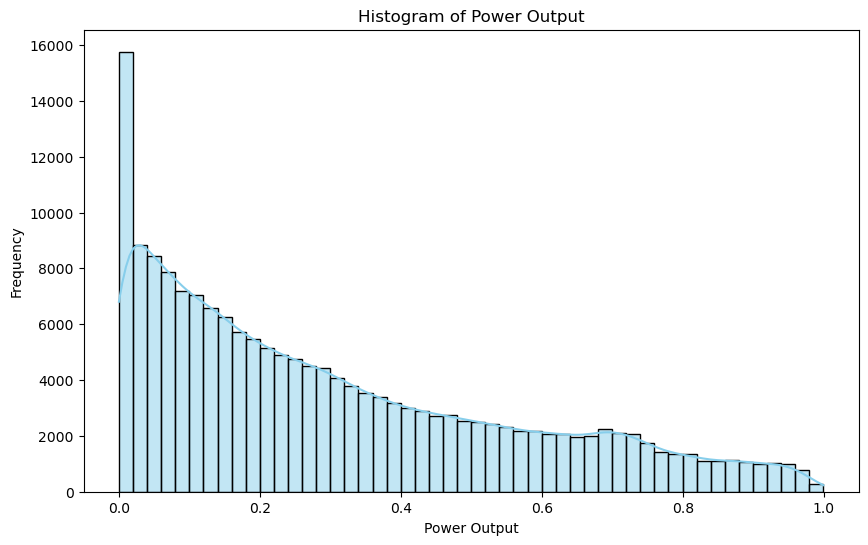

In [16]:
#Histogram of Power Output
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(combined_data_encoded['Power'], kde=True, bins=50, color="skyblue")
plt.title('Histogram of Power Output')
plt.xlabel('Power Output')
plt.ylabel('Frequency')
plt.show()

The histogram is right skewed with a significant number of observations having low power output. This means the wind turbines are operating at low efficiency most of the time. This distribution is non normal, however we can later address this with scaling and centering.

Next we will explore the relationships between the continuous variables using a correlation matrix.

### Correlation Matrix

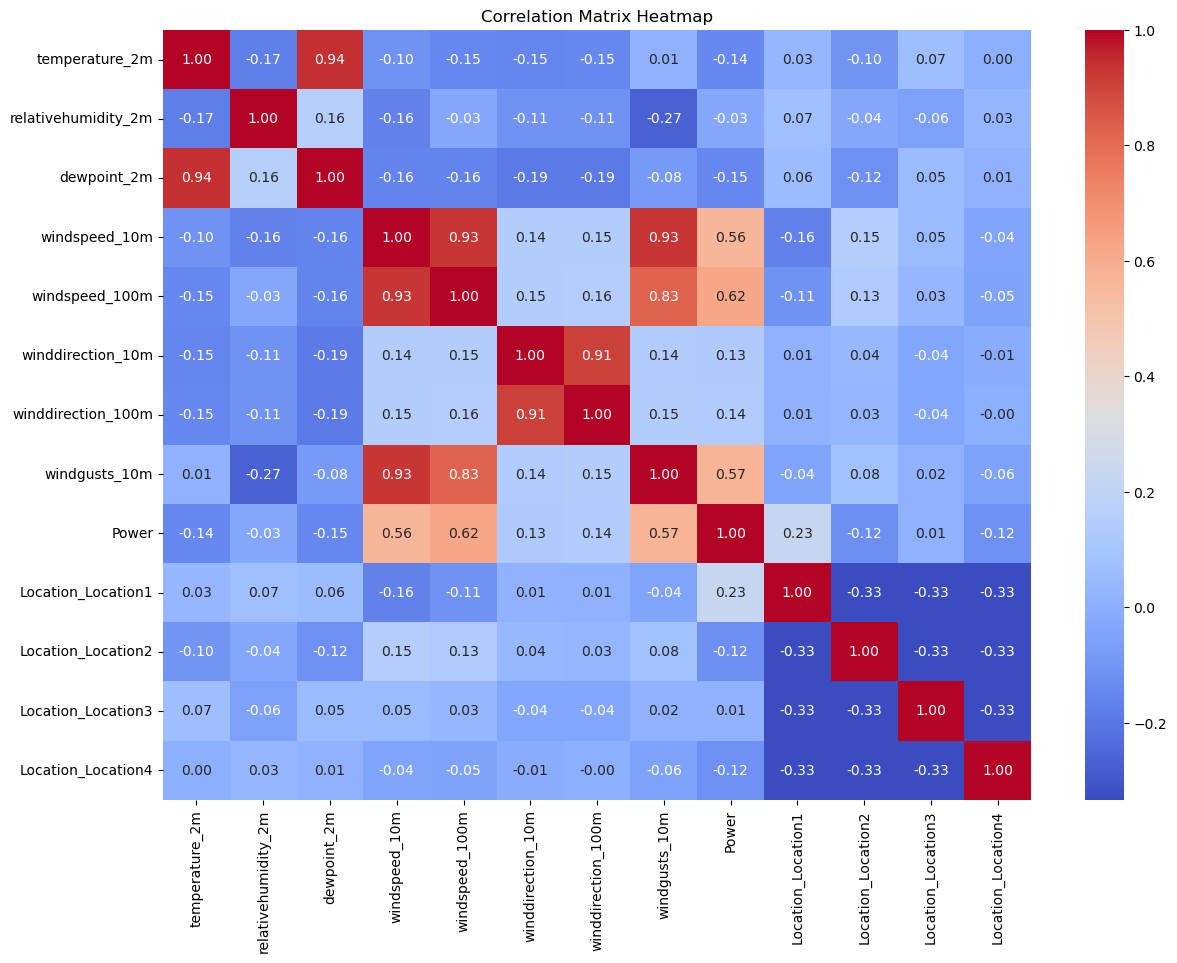

In [17]:
#Correlation Matrix
correlation_matrix = combined_data_encoded.corr()
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title('Correlation Matrix Heatmap')
plt.show()

Wind Speed and Power: There is a moderate positive correlation between wind speed (especially at 100m) and power output, which is expected since higher wind speeds generally lead to higher power generation from wind turbines.

Temperature and Dew Point: There is a very high positive correlation between temperature and dew point, indicating that as the air temperature rises, the dew point tends to rise as well, which is typical in meteorological data.

Wind Speed and Wind Gusts: Wind speed at 10m and 100m is highly correlated with wind gusts, suggesting that when wind speeds are high, gusts are also likely to be high.

Wind Speed and Relative Humidity: The high speed of wind decreases the level of humidity and low wind speed causes a high level of humidity. This is shown in our correlation map with relative humidity being slightly negatively correlated with windspeed.

Wind Direction: The wind direction at 10m and 100m shows a high degree of correlation, indicating that the wind direction is relatively consistent across these two altitudes.

Locations: The location variables are negatively correlated with each other due to one-hot encoding, meaning if one location is 1, the others must be 0.

Low Correlations with Humidity: Relative humidity does not show a strong correlation with power output, suggesting it might not be a strong predictor in this context.

Next, we can explore the different statistics of power output at each location.

## Boxplot of Location vs. Power

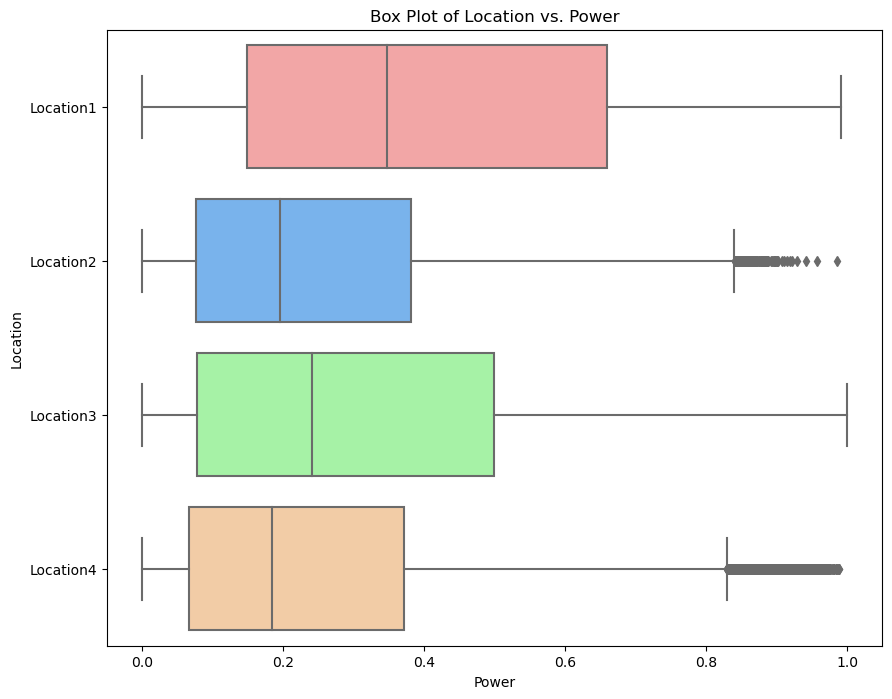

In [18]:
plt.figure(figsize=(10, 8))
lighter_colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99']
boxplot = sns.boxplot(x='Power', y='Location', data=combined_data, palette=lighter_colors)

hatch_patterns = ['/', '\\', '+', 'x', '*', 'o', 'O', '.']
for i, patch in enumerate(boxplot.artists):
    patch.set_hatch(hatch_patterns[i % len(hatch_patterns)])

boxplot.set_title('Box Plot of Location vs. Power')
plt.show()


Location 1 has the highest median power output of 0.347 and the highest IQR range between Q1 and Q3. There are no outliers shown in the range of the boxplot, meaning the weather has less highly optimal events for power output or our boxplot range is too small. 

Location 2 has a slightly lower median power output compared to Location 1, with a smaller IQR, indicating less variability in power output. It shows lots of outliers, indicating some possible high power output events. 

Location 3 has a median power output lower than Location 2, with a comparable IQR to Location 2, suggesting similar variability. There are no outliers present for Location 3, which could indicate more consistent power output levels.

Location 4 has the lowest median power output, with a very small IQR, indicating very little variability in power output. This could suggest a very consistent power output with few fluctuations despite the lowest median. 

Despite Location 4's consistency, Location 1 indicates the highest power output and we can explore its weather patterns next.

## Bar Charts of the Expected Value of Each Predictor

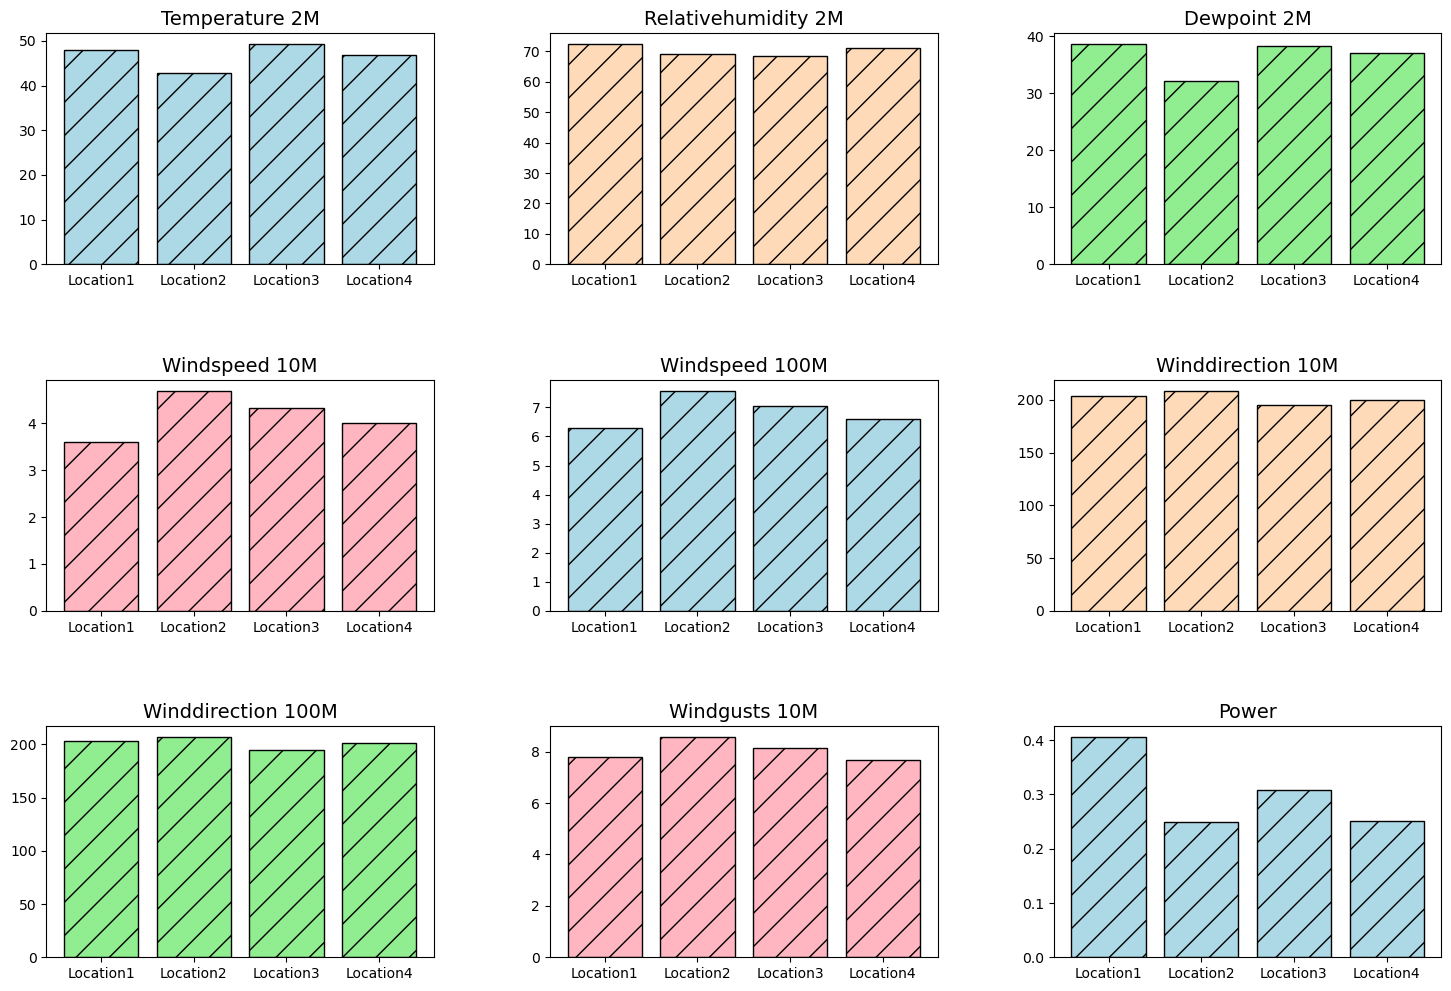

In [44]:
import matplotlib.pyplot as plt
#Grouping the data by 'Location' and calculate the mean for each group
grouped_data = combined_data.groupby('Location').mean()

# Since the 'Time' column doesn't make sense to average, we'll ignore it for this analysis
grouped_data = grouped_data.drop(columns=['Time'], errors='ignore')

lighter_colors = ['#add8e6', '#ffdab9', '#90ee90', '#ffb6c1'] 

def format_title(s):
    return s.replace('_', ' ').title()

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(18, 12))
fig.subplots_adjust(hspace=0.5, wspace=0.3)
axes = axes.flatten()

for i, col in enumerate(grouped_data.columns):

    axes[i].bar(grouped_data.index, grouped_data[col], color=lighter_colors[i % len(lighter_colors)], 
                edgecolor='black', hatch='/', label=col)
    axes[i].set_title(format_title(col), fontsize=14)
    axes[i].legend()

for i in range(len(grouped_data.columns), len(axes)):
    fig.delaxes(axes[i])

for ax in axes:
    ax.legend().set_visible(False)
    
plt.show()

Proving our correlation matrix, the average dewpoint and temperature are highly positively correlated with each other. Windspeeds at 100 m are in similar proportion to windspeeds at 10m, just with higher values due to the altitude, as explained earlier. We can see that relative humidity appears to maintain a consistent range across all locations. This consistency might suggest a regional climatic influence that uniformly affects relative humidity.

We could examine our correlation matrix again if the power output, which shows variation across the locations, correlates with the increased wind speed at higher altitudes, as wind power is a cubic function of wind speed. The math and physics of this phenomenon are shown below.

![Slide 8](slide_8.jpg)

Our correlation matrix indicates the positive correrlation between Power across all locations and windspeed at 100 meters is 0.62. We can demonstrate this visually below with a scatterplot.

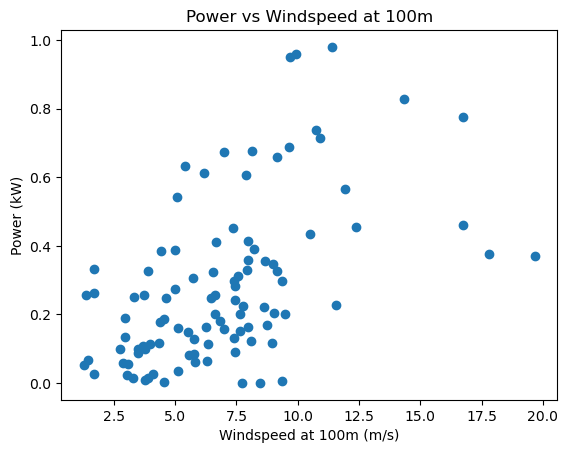

In [21]:
sampled_data = combined_data.sample(n=100)
plt.scatter(sampled_data['windspeed_100m'], sampled_data['Power'])
plt.title('Power vs Windspeed at 100m')
plt.xlabel('Windspeed at 100m (m/s)')
plt.ylabel('Power (kW)')
plt.show()

The scatterplot displays a rough positive correlation of the predictor windspeed with the response power output taken from a random sample of 100 observations.

## Centering and Scaling

Now we will center and scale our data to improve the stability of the data, reduce multicollinearity, and normalize it. We will exclude Time and Location, since they're non-numerical. We will then Center and Scale the data. 

1. Subtract the mean of each column from each value in the column to center the data.

2. Divide each centered value by the standard deviation of the column to scale the data.

In [47]:
from sklearn.preprocessing import StandardScaler
numeric_cols = combined_data.select_dtypes(include=['float64', 'int64']).columns
scaler = StandardScaler()
data_scaled_df = scaler.fit_transform(combined_data[numeric_cols])
combined_data_scaled = pd.DataFrame(data_scaled_df, columns=numeric_cols)
combined_data_scaled.head()

temperature_2m  relativehumidity_2m  dewpoint_2m  windspeed_10m  \
0       -0.824797             0.856757    -0.574031      -1.350261   
1       -0.829340             0.914472    -0.564477      -1.042214   
2       -0.902026             1.203045    -0.574031      -1.419821   
3       -0.874768             1.029901    -0.583585      -1.419821   
4       -0.879311             1.029901    -0.593139      -0.838505   

   windspeed_100m  winddirection_10m  winddirection_100m  windgusts_10m  \
0       -1.846063          -0.557910           -0.392707      -1.835037   
1       -0.949204          -0.507729           -0.432435      -1.005730   
2       -1.346713          -0.537837           -0.511892      -1.337453   
3       -1.376280          -1.441100           -0.958837      -1.779750   
4       -0.804655          -1.441100           -1.167412      -1.116304   

      Power  
0 -0.543785  
1 -0.625783  
2 -0.707392  
3 -0.789390  
4 -0.870999

We will not add our non-numeric columns back into the data for training. Time would not be meaningful for our predictions and would have high cardinality. Location can seem useful at first, but when trained on some models, it results in large RMSE errors. We also don't have any additional information on the locations, as the owner of the dataset cannot disclose where the turbines are. Therefore, we cannot do any further analysis on location or draw any conclusions based on the encoded variable. We simply combined them to give us more data to work with. 

## Model Building

Now that our data has been centered, scaled, and encoded, it's time to start building and fitting our regression models. We will use the root mean squared error metric to judge our models. The RMSE shows how far our predicted values differ from our actual observed values. Therefore, the lower the RMSE score, the better. We will start with the most basic machine learning model, linear regression. We will use cross-validation on all models to ensure optimal tuning and regularization. 

## Linear Regression using Cross Validation

Mean RMSE: 0.19531843839973645
Standard Deviation of the RMSE: 0.03301884634061891


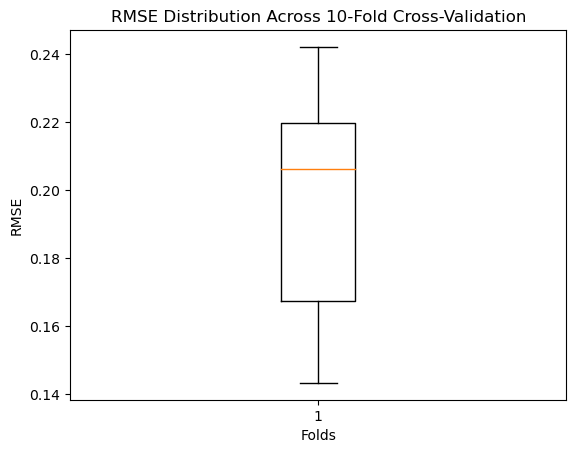

In [193]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
import numpy as np 

#Defining our response variable & dropping it from predictors
X = combined_data_scaled.drop('Power', axis=1)
y = combined_data['Power']

model_lr = LinearRegression()

neg_mse_cv_scores = cross_val_score(model_lr, X, y, cv=10, scoring='neg_mean_squared_error')

# Convert negative MSE scores to RMSE scores
rmse_cv_scores = np.sqrt(-neg_mse_cv_scores)

print(f"Mean RMSE: {rmse_cv_scores.mean()}")
print(f"Standard Deviation of the RMSE: {rmse_cv_scores.std()}")

#storing mean rmse as variable to avoid having to run model everytime I open notebook
rmse_lr = 0.19531843839973645

plt.boxplot(rmse_cv_scores)
plt.title('RMSE Distribution Across 10-Fold Cross-Validation')
plt.ylabel('RMSE')
plt.xlabel('Folds')
plt.show()

The boxplot shows the distribution of RMSE scores from a 10-fold cross-validation for a linear regression model. The mean RMSE is approximately 0.195, and the model has a relatively small standard deviation of RMSE scores, indicated by the short length of the box, which shows that the model's performance is consistent across different subsets of the data. The lack of outliers in the RMSE distribution suggests that there are no folds where the model performs very poorly or very well compared to the others. Overall, this level of consistency can be a good indicator that the model is stable and generalizes well to new data within the same properties as the training data.

## Elastic Net Regularization

Best Alpha: 0.1
Best l1_ratio: 0.1
RMSE: 0.20097641622297843


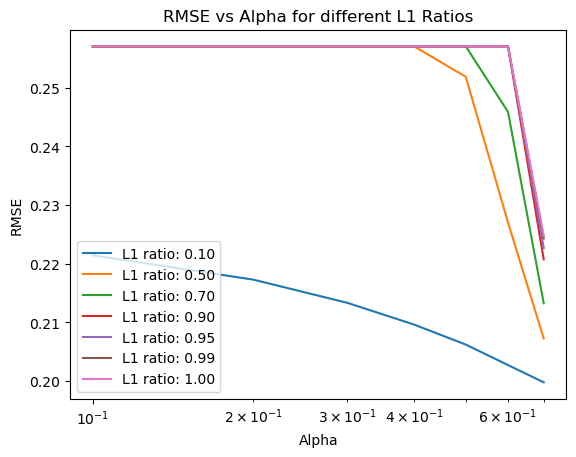

In [192]:
import matplotlib.pyplot as plt
from sklearn.linear_model import ElasticNetCV
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import numpy as np

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

l1_ratios = [.1, .5, .7, .9, .95, .99, 1]
alphas = [.1, .2, .3, .4, .5, .6, .7]

elastic_net_cv = ElasticNetCV(l1_ratio=l1_ratios, cv=10, random_state=42, alphas=alphas)
elastic_net_cv.fit(X_train, y_train)

y_pred = elastic_net_cv.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

best_alpha = elastic_net_cv.alpha_
best_l1_ratio = elastic_net_cv.l1_ratio_

print(f"Best Alpha: {best_alpha}")
print(f"Best l1_ratio: {best_l1_ratio}")
print(f"RMSE: {rmse}")

# Get the MSE for each combination of alpha and l1_ratio during the CV
mse_path = elastic_net_cv.mse_path_

# Calculate the mean RMSE for each combination of alpha and l1_ratio
rmse_path = np.sqrt(np.mean(mse_path, axis=2))

# Now we will plot RMSE vs alpha for each l1_ratio
for i in range(rmse_path.shape[0]):
    plt.plot(alphas, rmse_path[i, :], label=f'L1 ratio: {l1_ratios[i]:.2f}')

plt.xlabel('Alpha')
plt.ylabel('RMSE')
plt.legend()
plt.title('RMSE vs Alpha for different L1 Ratios')
plt.xscale('log')  
plt.show()

#storing mean rmse as variable to avoid having to run model everytime I open notebook
rmse_en = 0.20097641622297843


Alpha controls the strength of the regularization applied to the model in order to prevent overfitting. The colored lines represent the L1 ratios, a hyperparameter specific to regularization methods that blend L1 (Lasso) and L2 (Ridge) penalties, resulting in elastic net regularization. A L1 ratio of 0 is entirely L2 (ridge regression), while a L1 ratio of 1 is entirely Lasso regression.

As alpha increases, the RMSE tends to increase for all L1 ratios, which might indicate that too much regularization is introducing bias into the model. The L1 ratio of 0.10, represented by the blue line, shows the lowest increase in RMSE as alpha increases, suggesting that a lower proportion of L1 regularization relative to L2 is performing better in this scenario. The L1 ratio of 1.00, the magenta line, corresponds to LASSO regression (since it's all L1), and it shows a sharp increase in RMSE as alpha increases. This could mean that the model becomes too simple, and underfitting might be occurring. There is a convergence of RMSE values for different L1 ratios as alpha approaches zero, which would indicate less regularization is being applied. Overall, ridge regression could be performing best with this data.

## K Nearest Neighbors

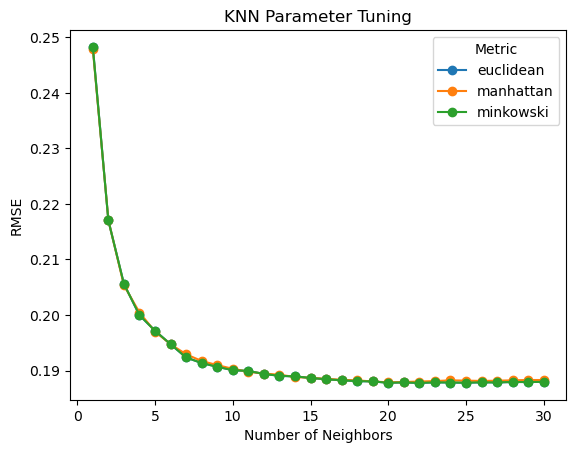

Best parameters: {'metric': 'euclidean', 'n_neighbors': 22, 'weights': 'uniform'}
Best RMSE score: 0.1877827591203056


In [93]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.neighbors import KNeighborsRegressor
import numpy as np
import matplotlib.pyplot as plt

X = combined_data_scaled.drop('Power', axis=1)
y = combined_data['Power']

#only use 10,000 observations
if len(y) > 10000:
    X, _, y, _ = train_test_split(X, y, train_size=10000, random_state=42)

# Define the model
knn = KNeighborsRegressor()

# Define the parameter grid
param_grid = {
    'n_neighbors': range(1, 31),
    'weights': ['uniform'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

grid_search = GridSearchCV(knn, param_grid, cv=10, scoring='neg_mean_squared_error')

# Fit the grid search to the data
grid_search.fit(X, y)

# Calculate the best RMSE score from the best mean test score
best_score_rmse = np.sqrt(-grid_search.best_score_)

# Extract the results for plotting
results = pd.DataFrame(grid_search.cv_results_)

# Plot RMSE against n_neighbors for different metrics
for metric in param_grid['metric']:
    mask = (results['param_weights'] == 'uniform') & (results['param_metric'] == metric)
    subset = results[mask]
    rmse_scores = np.sqrt(-subset['mean_test_score'])
    
    plt.plot(param_grid['n_neighbors'], rmse_scores, marker='o', label=metric)

plt.xlabel('Number of Neighbors')
plt.ylabel('RMSE')
plt.title('KNN Parameter Tuning')
plt.legend(title='Metric')
plt.show()

# Best parameters and best score
print("Best parameters:", grid_search.best_params_)
print(f"Best RMSE score: {best_score_rmse}")


#storing rmse as variable to avoid having to run model everytime I open notebook
rmse_knn = 0.1877827591203056

The best-performing model uses the Euclidean distance metric with 22 neighbors, resulting in the lowest RMSE of 0.1878, indicating a good balance between bias and variance for this dataset. The RMSE curves for Manhattan and Minkowski metrics closely follow each other and perform similarly across the range of neighbors, while the Euclidean metric has better performance. As the number of neighbors increases, the RMSE decreases sharply initially, especially for the Euclidean and Manhattan metrics, before plateauing. This means that adding more neighbors helps the model make better predictions up to a certain point before tapering off.

## Regression Trees using Bagging

To tune regression trees, we will use a smaller sample size of 10,000 observations to reduce training time.

Best Parameters: {'max_features': 'auto', 'min_samples_leaf': 6, 'n_estimators': 400}
Best RMSE: 0.1807616507657373


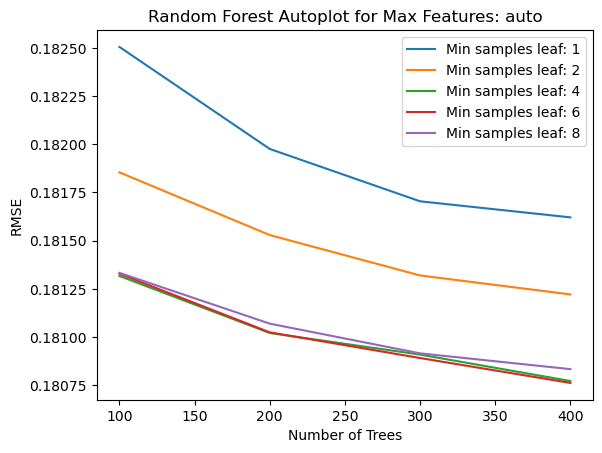

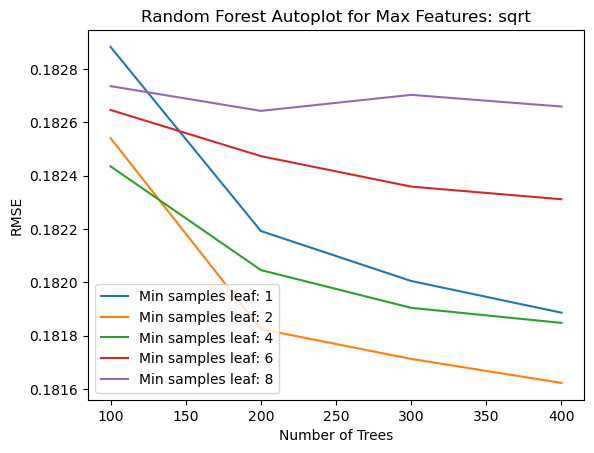

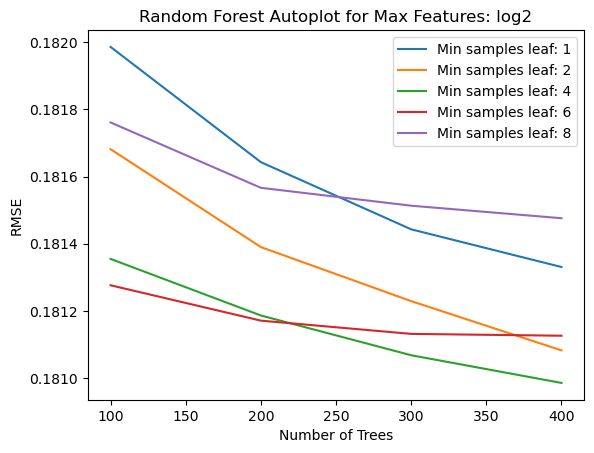

In [108]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

X = combined_data_scaled.drop('Power', axis=1)
y = combined_data['Power']

# Ensure only 10,000 observations are used for both training and tuning
X_sample, _, y_sample, _ = train_test_split(X, y, train_size=10000, random_state=42)

# Parameter grid for Random Forest
param_grid = {
    'n_estimators': [100, 200, 300, 400],
    'min_samples_leaf': [1, 2, 4, 6, 8],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Initialize the model
rf = RandomForestRegressor(random_state=42)

# Setup GridSearchCV for the entire sampled dataset
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit GridSearchCV using the sampled data
grid_search.fit(X_sample, y_sample)

# Best parameters and best score
best_params = grid_search.best_params_
best_score = np.sqrt(-grid_search.best_score_)  

print(f"Best Parameters: {best_params}")
print(f"Best RMSE: {best_score}")


results = pd.DataFrame(grid_search.cv_results_)
for max_features in param_grid['max_features']:
    subset = results[results['param_max_features'] == max_features]
    for min_samples_leaf in param_grid['min_samples_leaf']:
        series = subset[subset['param_min_samples_leaf'] == min_samples_leaf]
        plt.plot(series['param_n_estimators'], np.sqrt(-series['mean_test_score']), label=f'Min samples leaf: {min_samples_leaf}')
    plt.title(f'Random Forest Autoplot for Max Features: {max_features}')
    plt.xlabel('Number of Trees')
    plt.ylabel('RMSE')
    plt.legend()
    plt.show()
    
rmse_tunedrt = 0.1807616507657373


The first chart identifies the optimal parameters with 'max_features' as 'auto' and 'min_samples_leaf' at 6, resulting in the lowest RMSE with 400 trees. For 'max_features' set to 'sqrt' and 'log2', lower 'min_samples_leaf' values generally lead to lower RMSE, yet caution is advised as too low a value may risk overfitting. Overall, an increase in the number of trees tends to decrease RMSE across configurations, with diminishing returns beyond a certain number of trees. The best model balances complexity and generalization, avoiding the smallest leaf sizes to prevent overfitting.

## Boosted Random Forest

Best Parameters: {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 600}
Best RMSE: 0.1815990928602826


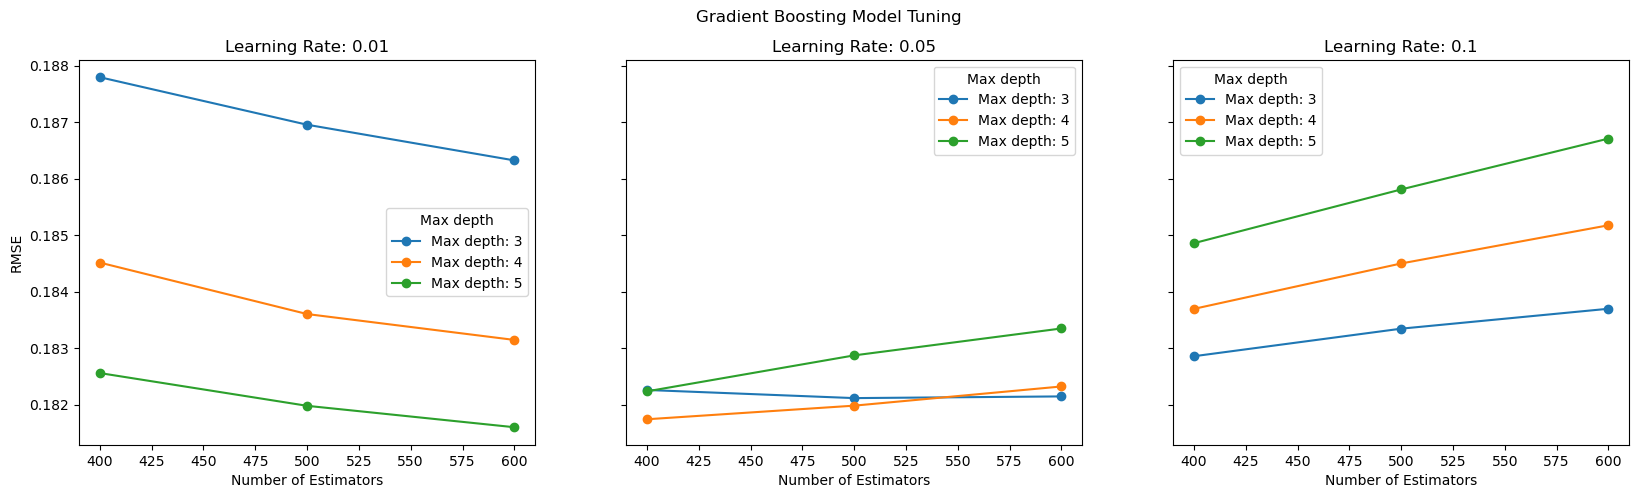

In [97]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd

X = combined_data_scaled.drop('Power', axis=1)
y = combined_data['Power']

# If the dataset has more than 10,000 observations, randomly sample 10,000 observations
if len(y) > 10000:
    X_sample, _, y_sample, _ = train_test_split(X, y, train_size=10000, random_state=42)
else:
    X_sample, y_sample = X, y

# Parameter grid
param_grid = {
    'n_estimators': [400, 500, 600],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5]
}

# Initialize the model
gbr = GradientBoostingRegressor(random_state=42)

# Setup GridSearchCV
grid_search = GridSearchCV(estimator=gbr, param_grid=param_grid, cv=10, scoring='neg_mean_squared_error')

# Fit GridSearchCV using the sample
grid_search.fit(X_sample, y_sample)

# Best parameters and best score
best_params = grid_search.best_params_
best_score = np.sqrt(-grid_search.best_score_)  

print(f"Best Parameters: {best_params}")
print(f"Best RMSE: {best_score}")


import matplotlib.pyplot as plt
from itertools import product

# Results from GridSearchCV
results = pd.DataFrame(grid_search.cv_results_)

# Convert the mean test scores to RMSE
results['mean_test_rmse'] = np.sqrt(-results['mean_test_score'])

# Plotting
fig, axes = plt.subplots(1, len(param_grid['learning_rate']), figsize=(20, 5), sharey=True)

for i, learning_rate in enumerate(param_grid['learning_rate']):
    for max_depth in param_grid['max_depth']:
        mask = (results['param_learning_rate'] == learning_rate) & (results['param_max_depth'] == max_depth)
        subset = results[mask]
        
        axes[i].plot(subset['param_n_estimators'], subset['mean_test_rmse'], marker='o', label=f'Max depth: {max_depth}')
        
        axes[i].set_title(f'Learning Rate: {learning_rate}')
        axes[i].set_xlabel('Number of Estimators')
        if i == 0:
            axes[i].set_ylabel('RMSE')
        axes[i].legend(title='Max depth')

plt.suptitle('Gradient Boosting Model Tuning')
plt.show()

#storing rmse as variable to avoid having to run model everytime I open notebook
rmse_boosted = 0.1815990928602826

For a learning rate of 0.01, increasing the number of estimators consistently decreases the RMSE across all max depths, with shallower trees (max depth: 3) outperforming deeper ones. At a learning rate of 0.05, the trend is similar, but the RMSE values are lower than those for a learning rate of 0.01, suggesting better performance overall. With the highest learning rate of 0.1, the performance diverges more noticeably between different max depths. Deeper trees (max depth: 5) now produce higher RMSEs, indicating potential overfitting as the number of estimators increases. Generally, a lower learning rate with more estimators seems to yield a better RMSE, especially with shallower trees, but there is a trade-off with computational efficiency and the risk of not converging on a solution with too low a learning rate.

## Model Results

In [186]:
results_dict = {
    'Model': ['Linear Regression', 'Elastic Net', 'K Nearest Neighbors', 'Regression Trees', 'Boosted Random Forest'],
    'RMSE': [rmse_lr, rmse_en, rmse_knn, rmse_tunedrt, rmse_boosted]
}

results_df = pd.DataFrame(results_dict)

results_df

Model      RMSE
0      Linear Regression  0.195318
1            Elastic Net  0.200976
2    K Nearest Neighbors  0.187783
3       Regression Trees  0.180762
4  Boosted Random Forest  0.181599

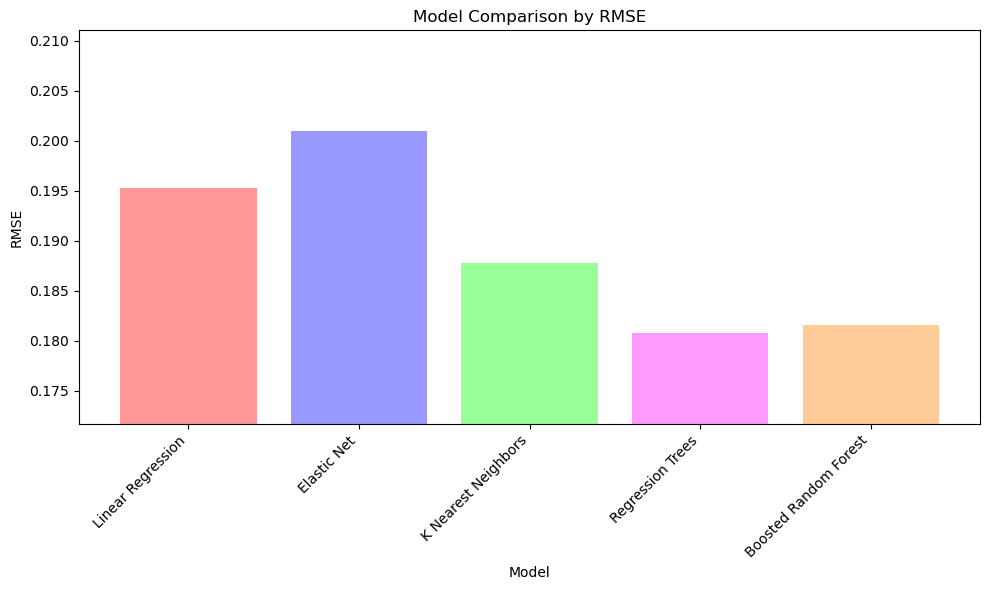

In [187]:
lighter_colors = ['#FF9999', '#9999FF', '#99FF99', '#FF99FF', '#FFCC99', '#FF99CC']

plt.figure(figsize=(10, 6))
plt.bar(results_df['Model'], results_df['RMSE'], color=lighter_colors)
plt.xlabel('Model')
plt.ylabel('RMSE')
plt.title('Model Comparison by RMSE')
plt.xticks(rotation=45, ha='right')
plt.ylim(min(results_df['RMSE']) * 0.95, max(results_df['RMSE']) * 1.05)

plt.tight_layout()
plt.show()


Now that we performed cross validation on all of our tuned models, we can observe that regression trees performed the best. A boosted random forest was in second place, while K Nearest Neighbors was in third place. This can possibly infer that are dataset is non-linear, as the non-linear models are performing the best. However, we will determine later if these lower rmse scores are performing better due to overfitting.

## Testing our Best Model

In [114]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

X = combined_data_scaled.drop('Power', axis=1)
y = combined_data['Power']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Parameter grid for Random Forest
param_grid = {
    'n_estimators': [100, 200, 300, 400],
    'min_samples_leaf': [1, 2, 4, 6, 8],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Initialize the model
rf = RandomForestRegressor(random_state=42)

# Setup GridSearchCV for the training set
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit GridSearchCV using the training data
grid_search.fit(X_train, y_train)

# Best parameters and best score from training
best_params = grid_search.best_params_
best_score = np.sqrt(-grid_search.best_score_)  # Converting from MSE to RMSE

print(f"Best Parameters: {best_params}")
print(f"Best RMSE on Training: {best_score}")

# Initialize a new model with the best parameters and fit it on the training set
rf_best = RandomForestRegressor(**best_params, random_state=42)
rf_best.fit(X_train, y_train)

# Test the model on the testing set to evaluate performance on unseen data
y_pred = rf_best.predict(X_test)
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"RMSE on Testing Set: {rmse_test}")



Best Parameters: {'max_features': 'sqrt', 'min_samples_leaf': 1, 'n_estimators': 400}
Best RMSE on Training: 0.16655012207442574
RMSE on Testing Set: 0.1649535340999675


Our RMSE on our final model has lowered by about .02. This could be partly due to the fact that we trained it on all 175,200 observations rather than just the 10,000 observations initially. Since we have more data to work with, and due to the law of large numbers, the models accuracy will improve with more data to a certain point. The optimal parameters for the Regression Tree model include using the square root of the number of features ('sqrt') to split nodes, allowing leaves with a minimum of one sample, and utilizing 400 trees. These parameters led to a low RMSE of approximately 0.1665 on the training set and an even lower RMSE of approximately 0.165 on the testing set, indicating a well-fitting model with good generalization capabilities. The lower RMSE on the test set suggests effective tuning and robust predictive performance. 

## Variable Importance

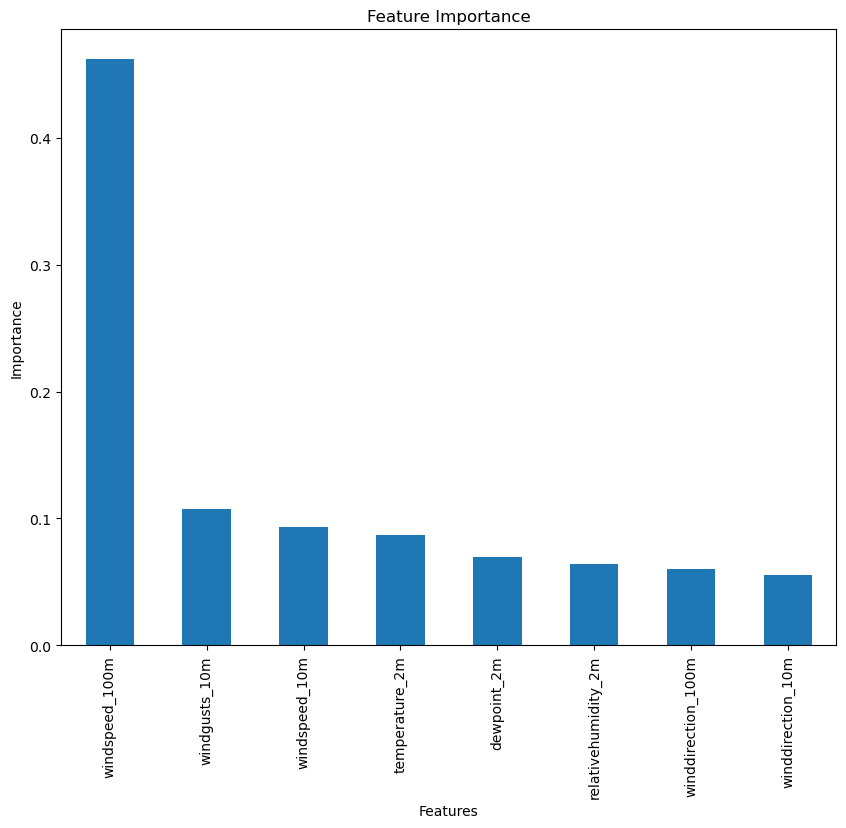

In [105]:
import pandas as pd
import matplotlib.pyplot as plt

# Aggregating feature importance
feature_importances = np.mean([
    tree.feature_importances_ for tree in bagging_regressor.estimators_
], axis=0)

feature_importance_df = pd.DataFrame(feature_importances, 
                                     index=X_train.columns, 
                                     columns=["Importance"])
feature_importance_df = feature_importance_df.sort_values(by="Importance", ascending=False)

#Plotting
plt.figure(figsize=(10, 8))
feature_importance_df.Importance.plot(kind='bar')
plt.title('Feature Importance')
plt.ylabel('Importance')
plt.xlabel('Features')
plt.show()


In the regression tree model, wind speed at 100m was by far the most important feature. This is likely due to the average wind turbine being 80–120 m tall, so wind speed at the height of the turbine blades would be a critical factor in power output. Even wind speed and gusts at lower levels were slightly more important than any other variables, which makes sense as power is directly a cubic function of wind speed. Temperature, dew point, and relative humidity have lesser but still significant importance, implying that atmospheric conditions also affect power generation, likely due to their impact on air density and therefore on turbine performance. Wind direction, despite being less significant, still holds some importance, likely due to the direction's impact on optimal wind capture by the turbine blades.

## Conclusion

Upon fitting various models, the regression tree model, with its consideration for non-linear relationships and interaction effects, stood out in its performance. The model's RMSE, an indicator of predictive accuracy, showed that the complexity captured by the tree structure handled the skewed and non-normal distribution of the power output data, as shown in the histogram in our exploratory data analysis. It's reasonable to conclude that the model's ability to partition the data into subsets that are more homogeneous (in terms of power output) contributed significantly to its success. The key feature influencing the model's predictions was wind speed at 100 meters, which aligns with expectations given the direct impact of wind speed on turbine output. Also, the importance of wind speed at varying altitudes highlighted the value of vertical wind profiles in understanding power generation, and the lesser but still significant importance of other meteorological variables like temperature and humidity.

Models like linear regression, which assume normality and linear relationships, were worse at capturing the trends of the skewed data, which likely led to their higher RMSE values. Elastic Net, with its regularization properties, would typically handle the skewness better than plain linear regression but still did not outperform the regression tree model. This suggests that the power output's relationship with the predictors is complex and possibly non-linear. The RMSE comparison also highlights the boosted random forest model's superior performance, likely due to its ensemble approach that combines predictions from multiple decision trees to reduce variance and avoid overfitting, a powerful strategy when dealing with skewed and non-normal data. The non-normal distribution of the dataset underscores the importance of model selection. For skewed data, models that make fewer assumptions about the distribution of the data, like tree-based methods, are often more suitable. They can capture complex patterns without the need for data transformation, which linear models would require. 

The most insightful revelation from the project was the clear dominance of wind speed as a predictor, overshadowing other environmental factors. While the model performed well, future improvements could involve integrating more granular temporal data to capture wind speed variability or exploring advanced machine learning techniques that can handle complex interactions between predictors more dynamically. The dataset could also be aggregated weekly or monthly to reduce noise. Additionally, considering the geographic and topological factors that affect wind patterns could further refine the model's accuracy. Pursuing this project further would contribute significantly to the optimization of wind energy forecasting, which is pivotal for the integration of renewable energy sources into power grids as we try to combat climate change.

## Sources

This dataset was found on [Kaggle.](https://www.kaggle.com/datasets/mubashirrahim/wind-power-generation-data-forecasting)

Facts and prior information about wind turbines were taken from the official department of energy [website.](https://www.energy.gov/eere/wind/wind-energy-technologies-office)

Adding the hide code button in HTML format was a challenge, but was able to do it thanks to this [stackoverflow post.](https://stackoverflow.com/questions/27934885/how-to-hide-code-from-cells-in-ipython-notebook-visualized-with-nbviewer)

All of the models were made with the help of the [sklearn library](https://scikit-learn.org/stable/auto_examples/ensemble/plot_adaboost_regression.html) and ChatGPT if debugging was needed.